In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [16]:
df = pd.read_csv('twitter_training.csv')

In [7]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:

df.head

<bound method NDFrame.head of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partition is ...     
74678  Just realized the windows partition of my Mac ...     
74679  Just realized between the windows partition of...     
74680  Just like the windows partition of my Mac is l...     

[74681 rows x 4 columns]>

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:

df.shape

(74681, 4)

In [11]:
df.describe

<bound method NDFrame.describe of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partition is ...     
74678  Just realized the windows partition of my Mac ...     
74679  Just realized between the windows partition of...     
74680  Just like the windows partition of my Mac is l...     

[74681 rows x 4 columns]>

In [18]:
col_names = ['ID', 'Borderlands', 'Positive', 'Content']
data = pd.read_csv('twitter_training.csv', names=col_names)

In [19]:

#checking null values

data.isnull().sum()

ID               0
Borderlands      0
Positive         0
Content        686
dtype: int64

In [20]:
data.dropna(axis=0 , inplace=True)

In [21]:
data.isna().sum()

ID             0
Borderlands    0
Positive       0
Content        0
dtype: int64

In [22]:
#checking duplicates
data.duplicated().sum()

2341

In [23]:

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [24]:

sentiment_counts = data['Positive'].value_counts()
sentiment_counts

Negative      21698
Positive      19713
Neutral       17707
Irrelevant    12537
Name: Positive, dtype: int64

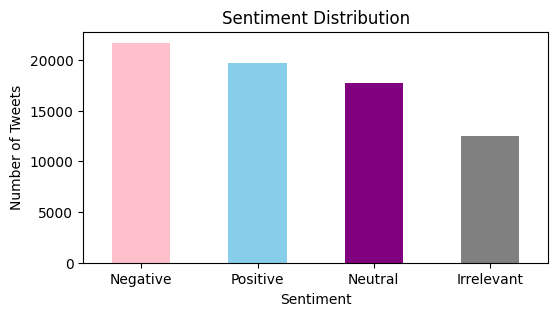

In [25]:

#Barplot visualization
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['pink', 'skyblue', 'purple', 'grey'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [26]:

brand_data = data[data['Borderlands'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Positive'].value_counts()
brand_sentiment_counts

Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: Positive, dtype: int64

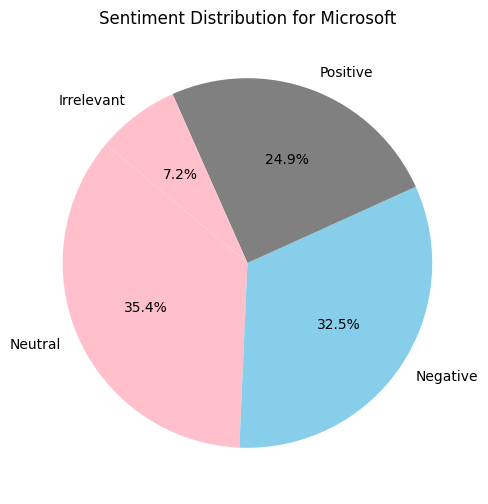

In [27]:

custom_colors = ['pink', 'skyblue', 'grey']  # Example custom colors for positive, neutral, and negative sentiments

plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Sentiment Distribution for Microsoft')
plt.show()
